# Exploratory Data Analysis I

## Table of Contents

- 1. [Problem Statement](#section1)<br>
- 2. [Data Loading and Description](#section2)
- 3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Data Normalization](#section303)<br/>
    - 3.4 [Preprocessing](#section304)<br/>
    - 3.5 [Post Profiling](#section305)<br/>
- 4. [Questions](#section4)
    - 4.1 [How are the restaurants serviced by Zomato spread across the globe?](#section401)<br/>
    - 4.2 [Which cuisines are popular iacross the restaurants covered by Zomato?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
- 5. [Conclusions](#section5)<br/>  

<a id=section1></a>
### 1. Problem Statement <img src="https://github.com/nazneenansari/dataset/blob/master/Zomato1.jpg?raw=true" width="500" height="300" />

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant such as

- Best cuisines of every part of the world which lies in their budget

- Find the value for money restaurants in various parts of the country for the cuisines

- Which locality of that country serves that cuisines with maximum number of restaurants

- The needs of people who are striving to get the best cuisine of the country

The bigger picture is to analyze the various factors aiding the customer to decide the appropriate restaurant like

Cuisine

Location


About Data: The data was collected using the Zomato API and has information about the Restaurant name, Location, Cuisine, Ratings and other demographics wherein each restaurant is identified uniquely by an ID.

My intention behind this analysis is to study how the sales are affected by different factors like Location, Cuisine, Ratings, etc and what is specifically dominating in an area concentrating more towards Indian market.

### 2. Data Loading and Description <a id=section2></a>

<a id=section201></a>
- The data was collected using the Zomato API and has information about the Restaurant name, Location, Cuisine, Ratings and other demographics wherein each restaurant is identified uniquely by an ID 
- The dataset comprises of __9551 observations of 21 columns__. Below is a table showing names of all the columns and their description.

         
| Column Name         | Description                                 |
|:-:: | :-:                    |               
| Restaurant Id       | Unique id of every restaurant               | 
| Restaurant Name     | Name of the restaurant                      |  
| Country Code        | Country in which restaurant is located      | 
| City                | City in which restaurant is located         |   
| Address             | Address of the restaurant                   |                           
| Locality            | Location in the city                        |
| Locality Verbose    | Detailed description of the locality        |
| Longitude           | Longitude coordinate                        |                      
| Latitude            | Latitude coordinate                         |
| Cuisines            | Cuisines offered by the restaurant          |
| Average Cost for two| Cost for two people in different currencies |
| Currency            | Currency of the country                     |
| Has Table Booking   | Can you reserve a table?                    |
| Has Online Delivery | Do they deliver at your doorstep?           |
| Is Delivering Now   | Is the Restaurant delivering food now?      |
| Switch to order menu| Switch to order menu ?                      |
| Price range         | Range of price of food                      |
| Aggregate Rating    | Average rating out of 5                     |
| Rating Color        | Depending upon the average rating color     |
| Rating Text         | Text on the basis of rating                 |
| Votes               | Number of ratings casted by people          |

#### Importing packages                                          

In [2]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
from subprocess import check_output
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

from wordcloud import WordCloud
from collections import Counter
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to display with a horizontal scroll instead of hiding the middle columns

#### Importing the Dataset

In [26]:
zomato_data= pd.read_csv('https://raw.githubusercontent.com/nazneenansari/dataset/master/zomato.csv' , encoding='Latin-1')   # Importing training dataset using pd.read_csv

### 3. Data Profiling <a id=section3></a>

### 3.1 Understanding the Dataset <a id=section301></a>

In [8]:
zomato_data.shape                                                 # This will print the number of rows and comlumns of the Data Frame

Zomato data has __9551 rows__ and __21 columns.__

In [77]:
zomato_data.columns                                   # This will print the names of all columns.

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'price_range',
       'aggregate_rating', 'rating_color', 'rating_text', 'votes',
       'rating_bin'],
      dtype='object')

In [5]:
zomato_data.head()

In [5]:
zomato_data.tail()                                        # This will print the last n rows of the Data Frame

In [6]:
zomato_data.info()                                         # This will give Index, Datatype and Memory information

In [ ]:
zomato_data.describe()

In [ ]:
zomato_data.isnull().sum()

From the above output we can see that all the columns has data and there is no null data.

### 3.2 Pre Profiling <a id=section302></a>

In [4]:
profile = pandas_profiling.ProfileReport(zomato_data)
profile.to_file(outputfile="zomato_before_preprocessing.html")

### 3.3 Data Normalization <a id=section303></a>

### 3.3.1 Standardize all column headers to lower case and '_' separated

In [51]:
zomato_data.columns = zomato_data.columns.str.replace(" ", "_")
zomato_data.columns = zomato_data.columns.str.lower()

### 3.4 Preprocessing <a id=section304></a>

- Dealing with missing values<br/>
    - Dropping the column __'Switch to order menu'__ as it has constant value __No__.
  

In [52]:
zomato_data.drop('switch_to_order_menu', axis = 1,inplace = True)

### 3.5 Post Pandas Profiling <a id=section305></a>

In [53]:
profile = pandas_profiling.ProfileReport(zomato_data)
profile.to_file(outputfile="zomato_after_preprocessing.html")

### 4. Questions and Hypothesis <a id=section4></a>

### 4.1 How are the restaurants serviced by Zomato spread across the globe ? <a id=section401></a>

- Using Plotly Scattergeo

In [54]:
#!pip install plotly 

plotly.tools.set_credentials_file(username='nazneen27', api_key='2mugk6sx5nUhsC88cpmP')
#help(go.Scattergeo())
df=zomato_data
data = [ go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['restaurant_name']+"\n"+df['locality']+"\n"+df['rating_text'],
        mode = 'markers',
        marker = dict( 
            size = 5, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'circle',
            cmin = 0,
            color = df['aggregate_rating'],
            cmax = df['aggregate_rating'].max(),
            colorbar=dict(
                title="Aggregate Rating",
                thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)"
            
            )
        ))]

layout_world=dict(

        title = 'Zomato Distribution across the World',
        geo = dict(
            scope = 'world',
            projection=dict( type='equirectangular' ),
            showland = True,
            landcolor = "white",
            countrywidth = 0.7,
            subunitwidth = 0.5
        ),
    ) 

fig = go.Figure(data=data, layout = layout_world)
py.iplot(fig, filename ='Zomato Distribution across the World')

The above visualization shows a comparative study of restaurants covered by Zomato worldwide. It is pretty evident that Zomato has it’s major concentration in __India followed by the United States Of America__.

- Using barh to study distribution in India

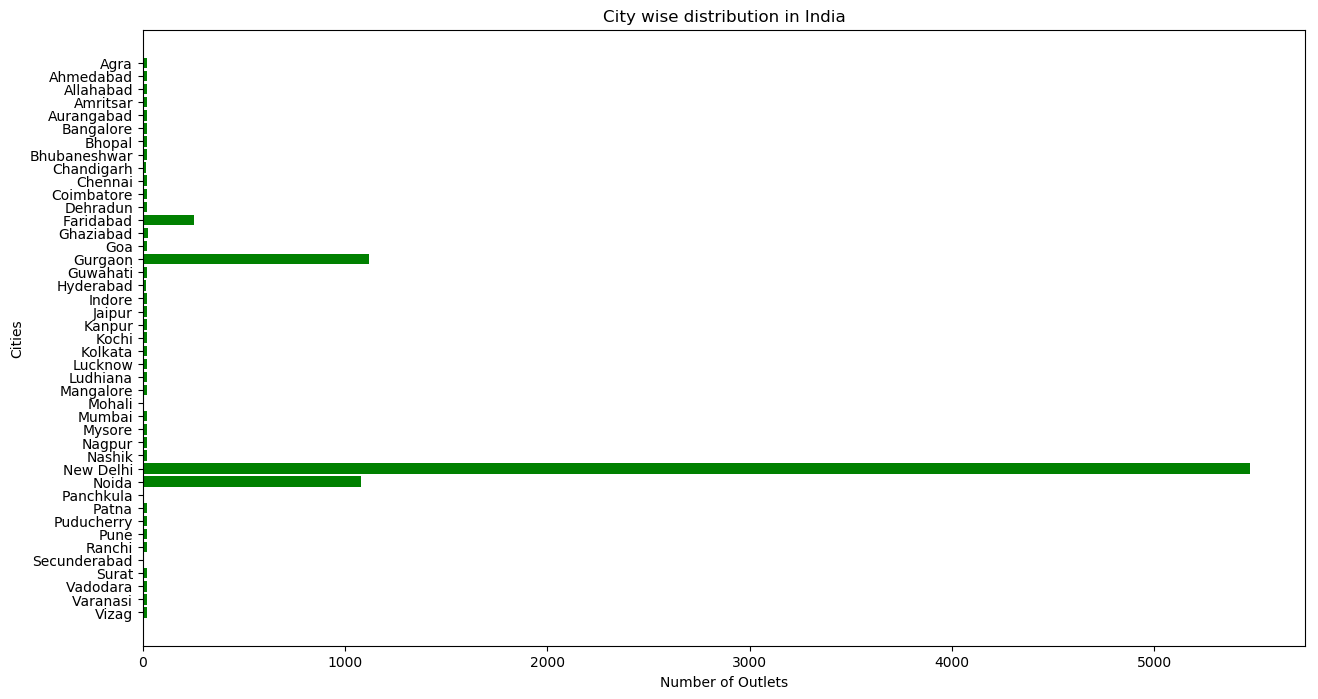

In [74]:
#!pip install matplotlib

plt.rcdefaults()
fig, ax = plt.subplots()

# x and y axis data
india_data=zomato_data[zomato_data['country_code']==1]
cities = india_data['city'].unique()
noOfOutlets = india_data.groupby('city').size()

ax.barh(cities, noOfOutlets, align='center',color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Cities')
ax.set_xlabel('Number of Outlets')
ax.set_title('City wise distribution in India')

fig.set_size_inches(15, 8 ,forward=True)
fig.savefig('F:\\Zomato_CityWise_Distribution.png', dpi=100)
plt.show()


Notice that in India, Zomato has majorly focused on Restaurants in the northern part with it’s prime location being National Capital Region of India.

### 4.2 Which cuisines are popular iacross the restaurants covered by Zomato?<a id=section402></a>

- Using Word Cloud

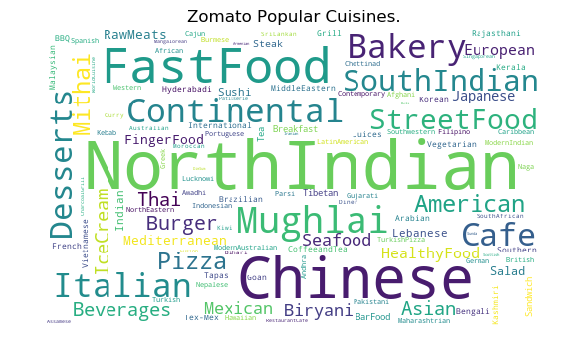

In [56]:
#!pip install wordcloud
#pip install Counter

df_cuisines = zomato_data.cuisines.str.split(",", expand=False)

cuisines = []
for content in df_cuisines:
    if (type(content) is list or type(content) is str ):
        result = [s.replace(" ", "") for s in content]
        cuisines = cuisines + result

counts = Counter(cuisines)

# Create and generate a word cloud image:
wordcloud = WordCloud(width =500 , height=300 ,background_color ='white', max_words=500, font_step=1).generate_from_frequencies(counts)

# Display the generated image: 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title('Zomato Popular Cuisines.') 
plt.savefig('F:\\Zomato_Popular_Cusines', dpi =100)
plt.show()


Through this visualization we have predicted the popularity of cuisines across all the restaurants and since the maximum restaurants are from India, the popular cuisine turned out to be __North Indian__ cuisine , followed by __Chinese__ and __Fast Food__.

### 4.3 How Zomato users have rated the restaurants?<a id=section403></a>

- Using Pie Chart

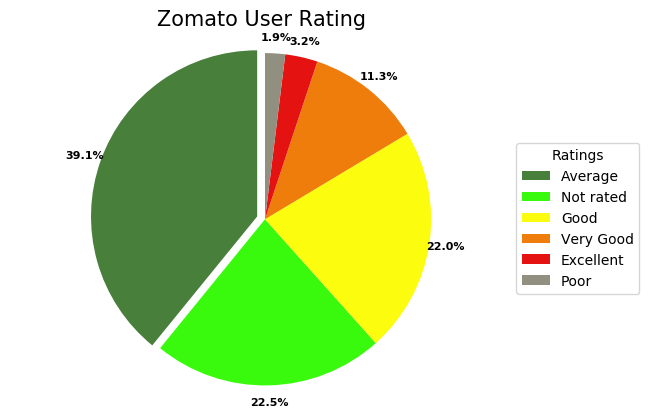

In [65]:

labels = zomato_data['rating_text']
counts = Counter(labels)
sorted_values=dict(counts.most_common())
list_keys = [ k for k in sorted_values ]
list_values = [ v for v in sorted_values.values() ]

explode = (0.5, 0, 0, 0, 0, 0)                # only "explode" the 1st slice 
colors =('#487f3b','#39f90c','#fcfc0f','#ef7d0b','#e51212','#918f7f')
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(list_values, explode=explode,colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90, radius = 10 , pctdistance = 1.1)
ax.axis('equal')                     # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(wedges, list_keys, title="Ratings",loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Zomato User Rating' , fontdict={'fontsize': 15})
fig.savefig('F:\\Zomato_Rating_Pie.png', dpi=100)
plt.setp(autotexts, size=8, weight="bold")
plt.show()

While Zomato has a lot of users rating the restaurants, it seems like the majority of people have rated restaurants to be __Average or Good__ and only a few have rated beyond Good. We also observe that approx 22% of the user have not rated the restaurants.Zomato can focus on improving their strategies which encourages user to rate the restaurants(may be by giving them points or rewards).

### 4.4 Does restaurants services affect their ratings?<a id=section404></a>

- Using Count Plot 

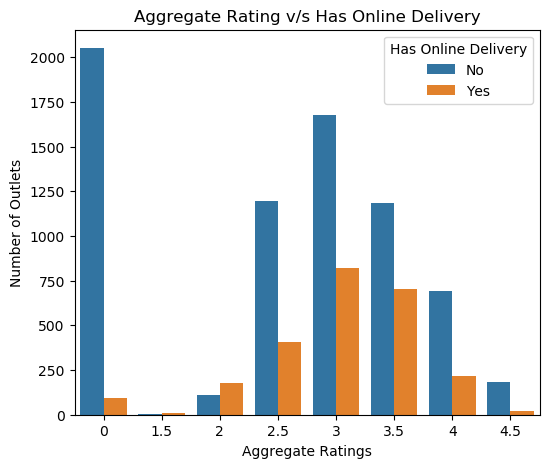

In [80]:
df['rating_bin'] = pd.cut(zomato_data['aggregate_rating'].dropna(),
                         [0,1.5,2,2.5,3,3.5,4,4.5,5],
                         labels=['0','1.5','2','2.5','3','3.5','4','4.5'], include_lowest=True)

fig,ax =plt.subplots(figsize=(6,5))
ax= sns.countplot(data = zomato_data, x = 'rating_bin', hue='has_online_delivery')
ax.legend(title="Has Online Delivery" )
ax.set(xlabel='Aggregate Ratings', ylabel='Number of Outlets')
plt.title('Aggregate Rating v/s Has Online Delivery')
plt.show()

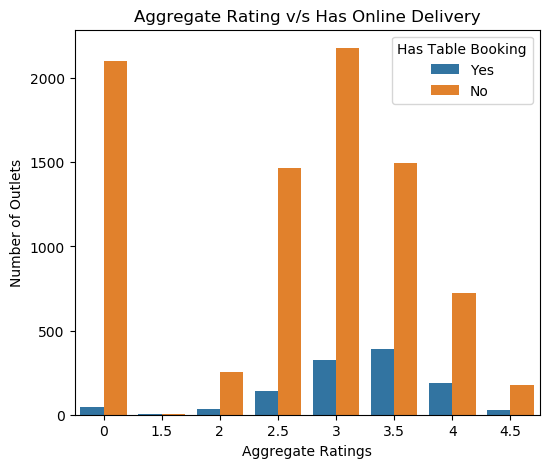

In [79]:
fig,ax =plt.subplots(figsize=(6,5))
ax= sns.countplot(data = zomato_data, x = 'rating_bin', hue='has_table_booking')
ax.legend(title="Has Table Booking" )
ax.set(xlabel='Aggregate Ratings', ylabel='Number of Outlets')
plt.title('Aggregate Rating v/s Has Online Delivery')
plt.show()

From the above graphs it is clearly visible that no matter whether a restaurant offer online order/table booking, the ratings __remain constant and are not affected much by these services.__

### 4.5 Does number of votes affect restaurant's ratings?<a id=section405></a>

Understand the vote distribution

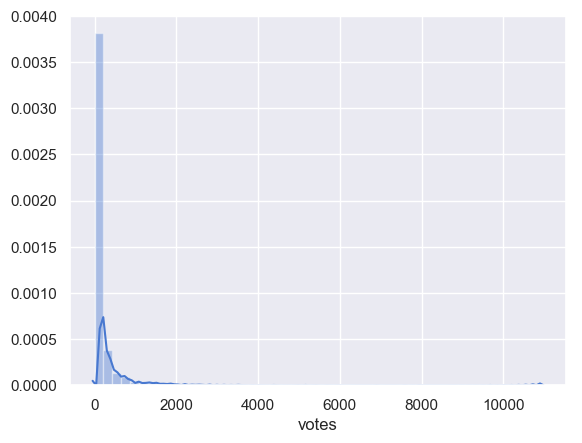

In [82]:
sns.set(color_codes=True)                       
sns.set_palette(sns.color_palette("muted"))
sns.distplot(zomato_data['votes'].dropna());

From the above distribution , we see that majority of the votes lies between __0 and 500__. So we will focus on votes from 0 to 500.

- Using Count Plot

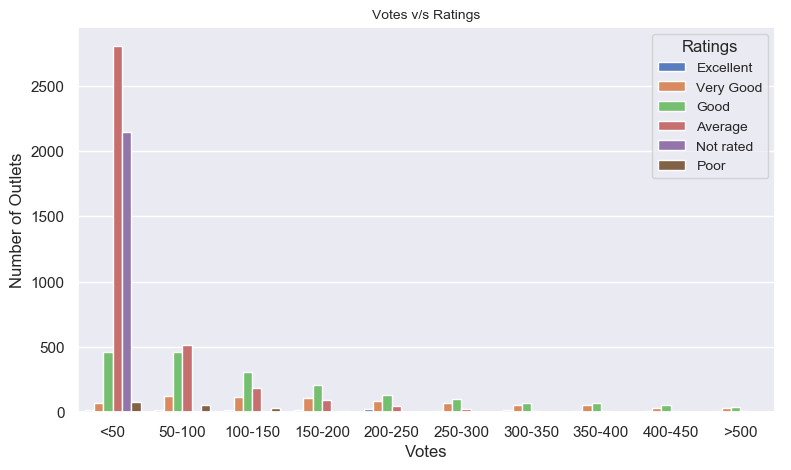

In [107]:
votes= zomato_data[zomato_data['votes'] < 500]
votes['vote_bin'] = pd.cut(votes['votes'].dropna(),
                         [0, 50,100,150,200,250,300,350,400,450,500],
                         labels=['<50','50-100','100-150','150-200','200-250','250-300', '300-350', '350-400','400-450', '>500'], include_lowest=True)
#print(votes)
fig,ax =plt.subplots(figsize=(9,5))
ax=sns.countplot(data = votes, x = 'vote_bin', hue= 'rating_text')
plt.legend(loc='upper right' , title='Ratings', fontsize='small')
ax.set(xlabel='Votes', ylabel='Number of Outlets')
plt.title('Votes v/s Ratings' , fontsize=10)
plt.show()

### 4.6 How the top cities in India have rated the restaurants?<a id=section406></a>

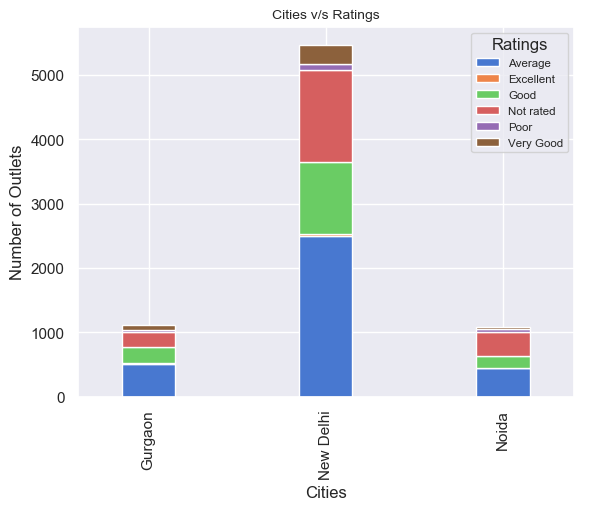

In [108]:
df1 = zomato_data[zomato_data['country_code']==1].groupby(['city'])['city'].size().nlargest(3)
df2 = zomato_data[zomato_data['city'].isin(dict(df1).keys())].groupby(['city','rating_text']).size().reset_index().pivot(columns='rating_text', index='city' , values=0).fillna(0)

ax = df2.plot( kind="bar" , stacked=True , sort_columns =True ,width=0.3)
ax.legend(title= 'Ratings' ,  fontsize='x-small')
ax.set(xlabel='Cities', ylabel='Number of Outlets')
plt.title('Cities v/s Ratings' , fontsize=10)
plt.show()

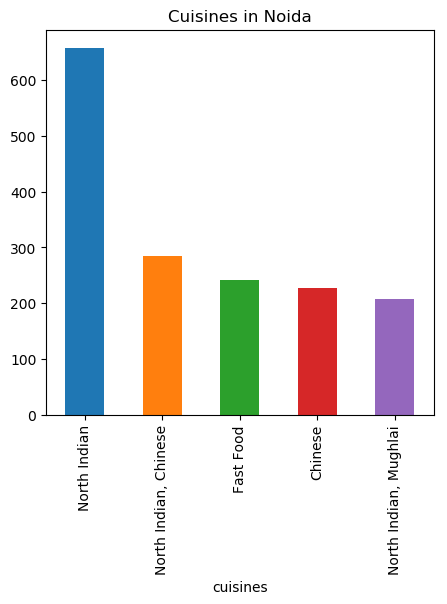

In [20]:

df3= df[df['city']=='New Delhi'].groupby('cuisines')['cuisines'].size().nlargest(5)
df3.plot( kind="bar" , sort_columns =True, figsize =(5,5), position=0.5, fontsize = 10, title ='Cuisines in Noida')




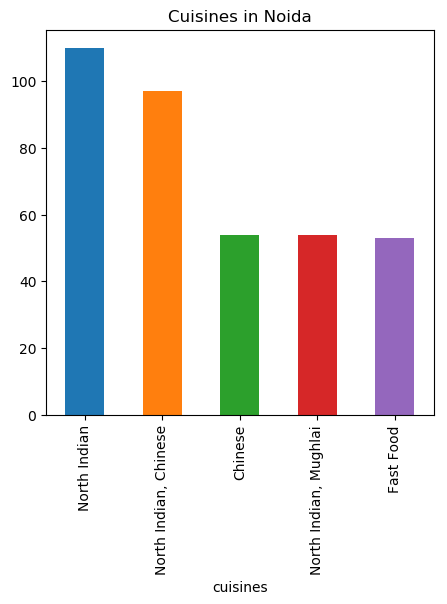

In [19]:
df4= df[df['city']=='Noida'].groupby('cuisines')['cuisines'].size().nlargest(5)
fig2= df4.plot( kind="bar" , sort_columns =True, figsize =(5,5), position=0.5, fontsize = 10, title ='Cuisines in Noida')



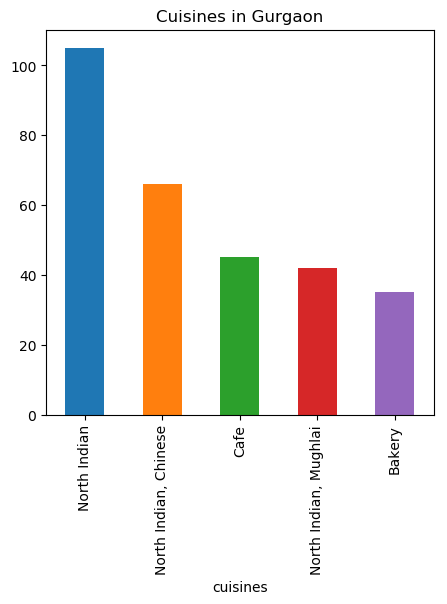

In [21]:
df5= df[df['city']=='Gurgaon'].groupby('cuisines')['cuisines'].size().nlargest(5)
fig3=df5.plot( kind="bar" , sort_columns =True, figsize =(5,5) ,position=0.5, fontsize = 10, title= 'Cuisines in Gurgaon')


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


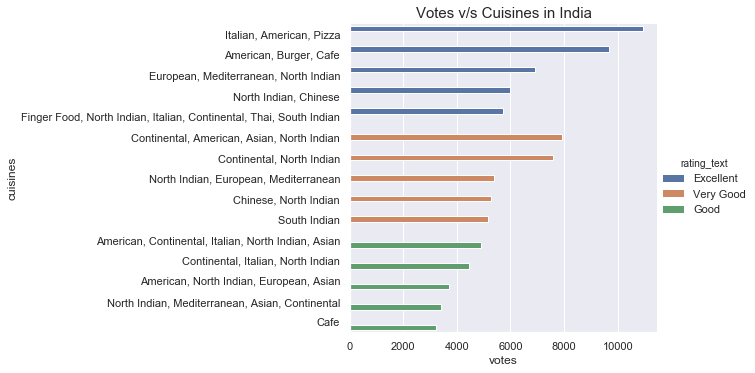

In [369]:
df2 =df[ df['country_code'] ==1]
df3 = df2[df['rating_text'] == 'Excellent'].groupby(['cuisines' , 'votes' , 'rating_text'])['rating_text'].size().to_frame('count').reset_index().nlargest(5 , columns='votes')
df4 = df2[df['rating_text'] == 'Very Good'].groupby(['cuisines' , 'votes', 'rating_text'])['rating_text'].size().to_frame('count').reset_index().nlargest(5 , columns='votes')
df5 = df2[df['rating_text'] == 'Good'].groupby(['cuisines' , 'votes', 'rating_text'])['rating_text'].size().to_frame('count').reset_index().nlargest(5 , columns='votes')

df6=pd.concat([df3, df4, df5], axis=0).reset_index()
sns.set(rc={'figure.figsize':(11.7,12.0)})
sns.catplot(x="votes", y="cuisines", hue='rating_text', kind="bar", data=df6);
plt.title('Votes v/s Cuisines in India' , fontsize= 15)
plt.show()




In [365]:
(titanic_data.Survived==0).sum()

NameError: name 'titanic_data' is not defined

Using __donut pie chart__ to see the relationship between __survival and gender__

In [30]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

In [31]:
import matplotlib.pyplot as plt
 
# Make data: 
group_names=['Survived', 'Not Survived']
group_size=[342,549]
subgroup_names=['Survived.Male','Survived.Female','Not Survived.Male','Not Survived.Female']
subgroup_size=[88,209,450,66]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()


<a id=section403></a>

### 4.4. What is the rate of survival of males, females and child on the basis of Passenger Class?

- Using mathematical function

In [32]:
print("% of survivals in") 
print("Pclass=1 : ", titanic_data.Survived[titanic_data.Pclass == 1].sum()/titanic_data[titanic_data.Pclass == 1].Survived.count())
print("Pclass=2 : ", titanic_data.Survived[titanic_data.Pclass == 2].sum()/titanic_data[titanic_data.Pclass == 2].Survived.count())
print("Pclass=3 : ", titanic_data.Survived[titanic_data.Pclass == 3].sum()/titanic_data[titanic_data.Pclass == 3].Survived.count())

- Using crosstab function

In [33]:
pd.crosstab([titanic_data.GenderClass, titanic_data.Survived], titanic_data.Pclass, margins=True).apply(lambda r: 100*r/len(titanic_data), axis=1).style.background_gradient(cmap='autumn_r')

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of __plotting.__

- Using __violin plot__ to see the relationship between __Pclass and Survived__

In [34]:
sns.violinplot('Pclass','Survived', kind='point', data = titanic_data)
plt.title('Violinplot Pclass Vs Survived')
plt.show()

Above is another beautiful way to see how the survival rate is varying with Passenger class.
- __Pclass 3__ have __more__ people who __died__, and for __Pclass 1 survival rate is more.__

 Drawing __factorplot__ to look at the __distribution of popluation__ with __Pclass and GenderClass.__

In [35]:
sns.factorplot('Pclass', data=titanic_data, hue='GenderClass', kind='count')
plt.title('Factorplot with kind = "count" for Pclass and GenderClass')

1. __Pclass 3__ have _maximum_ number of __males__
2. __Pclass 1__ have _minimum_ number of __children__.

- using factorplot to see the variation of __surviavl rate with Pclass and GenderClass.__

In [36]:
sns.factorplot('Pclass','Survived', data=titanic_data, hue='GenderClass')
plt.title('Factorplot for Survivale rate variation with Pclass and GenderClass')

The above graph shows:
1. the survival rate for male is very __low__ _irrespective of the class_ he belongs to. 
2. And, the survival rate is _less_ for all the _3rd class passengers._
3. __Almost all women__ in Pclass __1 and 2 survived__ and __nearly all men__ in Pclass __2 and 3 died.__

<a id=section404></a>

### 4.4 What is the survival rate considering the Embarked variable?

- Using countplot 

In [37]:
sns.countplot('Embarked',data=titanic_data, hue='Survived')

1. __Maximum___ number of people have __Southampton__ as port of embarkment. 
2. Also observe people who boarded at _Cherbourg_, _more_ people _survived than died_, and this is reverse for Queenstown.

- Using __factorplot__ and __kind = 'point'__

In [38]:
sns.factorplot('Embarked','Survived', kind='point', data = titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

<a id=section405></a>

### 4.5. Survival rate - Comparing Embarked and Sex.

- Distribution of _GenderClass_ with respect to _Port of Embarkment_ using __Countplot__.

In [39]:
sns.countplot('Embarked',data=titanic_data, hue='GenderClass')

Most of the people boarded from __S__, Also among all who boarded, __males__ constitutes the __majority__ of percentage.

- Using Factorplot to see variation of __survival rate with port of embarkment and GenderClass__

In [40]:
sns.factorplot('Embarked','Survived', hue= 'GenderClass', kind='point', data= titanic_data)
plt.title('Factor plot showing survival rate variation with Embarked and GenderClass ')
plt.show()

- Chances of survival of __females__ who boarded from __C__ is _highest_.
- Chances of survival of __males__ boarding from __Q__ is _lowest_

<a id=section406></a>

### 4.6 How survival rate vary with Embarked, Sex and Pclass.

Seeing relation between Pclass and Embarked.

In [41]:
relation = pd.crosstab( titanic_data.Embarked, titanic_data.Pclass )
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between Pclass and Embarked',size=20)

Maximum people who boarded from __S__ belongs to __Pclass 3__.<br/>
Most of the passengers belonging to __Pclass 1__ boarded from __C and S__  


In [42]:
dummy = relation.div(relation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Emabarked')

- Using Swarmplot

In [43]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="Embarked", y="Age", hue="GenderClass", palette="gnuplot", data=titanic_data)

- Using factorplot with kind = 'point'

In [44]:
sns.factorplot('Embarked','Survived', col='Pclass', hue= 'GenderClass', kind='point', data = titanic_data)
plt.show()

- Practically all _women_ of __Pclass 2__ that embarked in __C and Q survived__, also nearly all _women_ of __Pclass 1__ survived_.
- All _men_ of __Pclass 1 and 2__ embarked in __Q died__, survival rate for men in __Pclass 2 and 3__ is always __below 0.2__.
- For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. __0.4__

<a id=section407></a>

### 4.7 Segment age in bins with size 10.

In [45]:
for i in range(8,0,-1):
        titanic_data.loc[ titanic_data['Age'] <= i*10, 'Age_bin'] = i

In [46]:
print(titanic_data[['Age' , 'Age_bin']].head(10))

In [47]:
titanic_data.plot.hexbin(x='Age_bin', y='Survived', gridsize=12)

Comparing count of those who survived and died with respect to the Age_bin they are in.
- __Age_bin 1__: As you can see hexagon for Survived( 1.0 ) is darker than Died(0.0), means __more children survived than died__.
- __Age_bin 3__: __More died than survived__, Also count of survived is highest among all age bins ( see horizontaly along Survived = 1.0 ) , means maximum people who boarded Titanic were from this age group. 
- __Age_bin >4__: More people died than survived.

In [48]:
sns.barplot(x = "Age_bin", y = "Survived", hue = "Pclass", data = titanic_data)
plt.show()

- Calculating number of people of Age_bin = 1 and 8 from each Pclass.

In [49]:
titanic_data[(titanic_data.Age_bin == 1)]['Pclass'].value_counts()

In [50]:
titanic_data[(titanic_data.Age_bin == 1)&(titanic_data.Pclass == 1)]['Survived']

In [51]:
titanic_data[(titanic_data.Age_bin == 8)]['Pclass'].value_counts()

- Among children of __age 0-10 yrs__ we dont have enough data points(3) in Pclass 1, therefore __discarding it__ (blue line of Age_bin 1)<br/>
- Also number of passengers belonging to age group __70-80 yrs__, is very less, therefore __ignoring them.__<br/>
- In __each Pclass__, we can see that the probability of survivying of __small children(Age = 0-10 yrs)__ is _higher_ than rest age group.<br/>
- In every Age_bin(ignoring Pclass 1 of first, and last Age_bin), __survival probability is highest for Pclass 1 and lowest for Pclass 3.__

In [52]:
sns.factorplot('Age_bin','Survived',hue='Sex',kind='point',data=titanic_data)
plt.show()

Its clear from the above graph that among people of all the ages, __females__ in general have __higher probability of survival than males__.

In [53]:
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=titanic_data)
plt.show()

Calculating number of females from each Pclass in age group 1.

In [54]:
titanic_data[(titanic_data.Age_bin == 1) & (titanic_data.Sex =='female')]['Pclass'].value_counts()

From the factor plot:<br/>
- Among __males__, probability of survival of __children__ is _higher_ than rest age groups.<br/>
- In general for males, as __Pclass increases, survival probability decreases.__
- Among female children (Age_bin == 1), there is only 1 girl, therfore _discarding_ this.<br/>
- For the rest of the females, as _Pclass increases_, _survival probability decreases._<br/>
- You can also see survival rate within each Pclass for males and females.

<a id=section408></a>

### 4.8 Analysing survival rate with FamilySize.

- Using __factorplot__ to know the survival rate on the basis of __FamilySize__.

In [55]:
ax = sns.factorplot(x='FamilySize', y='Survived', data=titanic_data, kind='violin', aspect=1.5, size=6, palette="Greens")
ax.set(ylabel='Percent of Passengers')
plt.title('Survival by Total Family Size')

As __size of family increases__ its chances of survival also __increases__.

<a id=section409></a>

### 4.9 Segment fare in bins of size 12.

- Using Distplot to see the distribution of __Fare__. 

In [56]:
sns.distplot(titanic_data['Fare'],color ='g')
plt.title('Distribution of Fare')
plt.show()

We have seen that __'Fare'__ mostly varies between __10 and 90.__ We will use this information to create bins.

- Creating a new column named __'Fare_bin'__ based on 12 interval ranges in 'Fare' as __12 bins.__

In [57]:
for i in range(12,0,-1):
    titanic_data.loc[titanic_data['Fare'] <= i*10, 'Fare_bin'] = i
titanic_data.loc[titanic_data['Fare'] >110, 'Fare_bin']= 12

In [58]:
print(titanic_data[['Fare' , 'Fare_bin']].groupby('Fare_bin')['Fare'].count())

- Using __barrplot__ to plot the relationship between __survival rate and Fare_bin and Pclass.__

In [59]:
sns.barplot(x = "Fare_bin", y = "Survived", hue = "Pclass", data = titanic_data)
plt.show()

- As __fare increases, survival chances also increases__.
- Also __Pclass 1__ (blue color) have __more chances to survive__ compared to other Pclass.

<a id=section410></a>

### 4.10 Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'

In [60]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of Pclass 1 survived than died (First peak of red is higher than blue)
- More people of Pclass 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

<a id=section411></a>

### 4.11 Establish coorelation between all the features using heatmap.

In [61]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section412></a>

### 4.12 Hypothesis: Women and children are more likely to survive

On studying Questionnaire 4.1, 4.2 and 4.3 we observed that an overwhelming percentage of __women & children__ have survived the titanic clash.
- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

<a id=section5></a>

## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Age, Embarked, Fare, SibSp and Parch_ on the rate of survival.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively coorelated with.__ 
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 